In [2]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [3]:
# Load dataset
df = pd.read_csv('flattened_street_dataset.csv')

In [4]:
# Separate features and labels
X = df.drop('label', axis=1).values
y = df['label'].values

In [5]:
# Normalize 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [7]:
y_pred = lr_model.predict(X_test)
y_prob = lr_model.predict_proba(X_test)[:, 1]  # Probability for class 1 (street with holes)


In [8]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2106
           1       0.85      0.89      0.87      1526

    accuracy                           0.89      3632
   macro avg       0.88      0.89      0.88      3632
weighted avg       0.89      0.89      0.89      3632



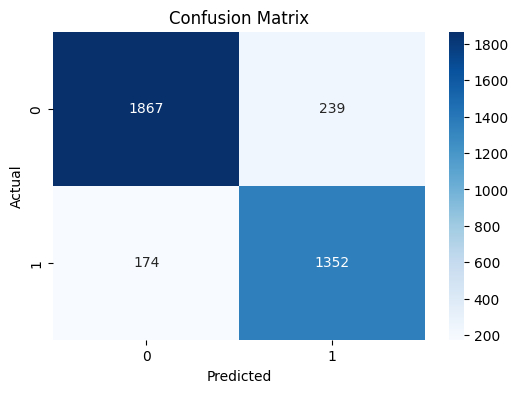

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [10]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9407145408674461


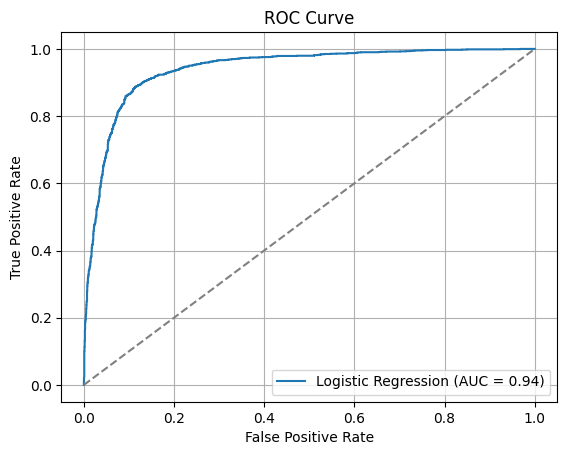

In [11]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
from sklearn.metrics import accuracy_score

train_pred = lr_model.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)

test_pred = lr_model.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")


Training Accuracy: 1.0000
Testing Accuracy: 0.8863


In [ ]:
lr_corrected_model = LogisticRegression(C=0.01, solver='lbfgs', max_iter=1000) #  smaller C for stronger regularization
lr_corrected_model.fit(X_train, y_train)

y_pred_corrected = lr_corrected_model.predict(X_test)
y_prob_corrected = lr_corrected_model.predict_proba(X_test)[:, 1]

In [14]:
print("Corrected Model Classification Report:")
print(classification_report(y_test, y_pred_corrected))

roc_auc_corrected = roc_auc_score(y_test, y_prob_corrected)
print(f"Corrected Model ROC-AUC Score: {roc_auc_corrected:.4f}")

train_acc_corrected = accuracy_score(y_train, lr_corrected_model.predict(X_train))
test_acc_corrected = accuracy_score(y_test, y_pred_corrected)
print(f"Corrected Model Training Accuracy: {train_acc_corrected:.4f}")
print(f"Corrected Model Testing Accuracy: {test_acc_corrected:.4f}")

Corrected Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2106
           1       0.88      0.91      0.89      1526

    accuracy                           0.91      3632
   macro avg       0.91      0.91      0.91      3632
weighted avg       0.91      0.91      0.91      3632

Corrected Model ROC-AUC Score: 0.9618
Corrected Model Training Accuracy: 0.9754
Corrected Model Testing Accuracy: 0.9097


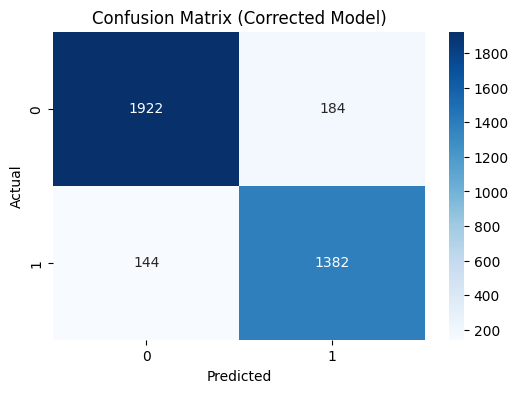

In [15]:
cm_corrected = confusion_matrix(y_test, y_pred_corrected)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_corrected, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Corrected Model)")
plt.show()


In [16]:
train_pred = lr_corrected_model.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)

test_pred = lr_corrected_model.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")


Training Accuracy: 0.9754
Testing Accuracy: 0.9097



--- Prediction for C:\Users\mousa\Downloads\3346951-1712454135.jpeg ---
Predicted: Good Street
Probability of being a 'Street with Holes': 0.0729


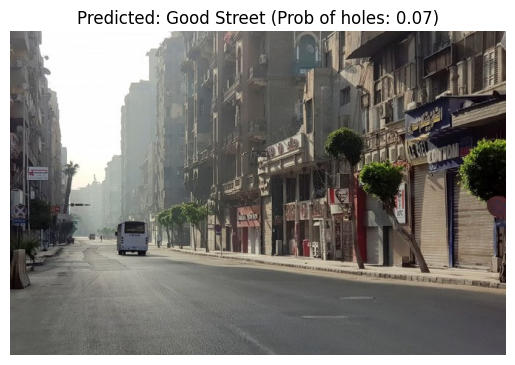

In [17]:

def test_single_image(image_path, model, scaler, image_size=(64, 64)):
    try:
        # Load and resize the image
        img = Image.open(image_path).convert('RGB').resize(image_size)

        # Convert to numpy array and normalize pixel values
        img_array = np.array(img) / 255.0

        # Flatten the image (same as how the CSV was created)
        img_flat = img_array.flatten()

        # Reshape for the scaler (scaler expects a 2D array: [n_samples, n_features])
        img_flat_reshaped = img_flat.reshape(1, -1)

        # Scale the image using the *fitted* scaler
        img_scaled = scaler.transform(img_flat_reshaped)

        # Make a prediction
        prediction = model.predict(img_scaled)[0]
        prediction_proba = model.predict_proba(img_scaled)[:, 1][0] # Probability of class 1

        return prediction, prediction_proba

    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
        return None, None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None

test_image_path = r"C:\Users\mousa\Downloads\3346951-1712454135.jpeg" 

predicted_label, probability_of_holes = test_single_image(test_image_path, lr_corrected_model, scaler)

if predicted_label is not None:
    print(f"\n--- Prediction for {test_image_path} ---")
    if predicted_label == 0:
        print("Predicted: Good Street")
    else:
        print("Predicted: Street with Holes")
    print(f"Probability of being a 'Street with Holes': {probability_of_holes:.4f}")


    img_display = Image.open(test_image_path)
    plt.imshow(img_display)
    plt.title(f"Predicted: {'Street with Holes' if predicted_label == 1 else 'Good Street'} (Prob of holes: {probability_of_holes:.2f})")
    plt.axis('off')
    plt.show()


--- Prediction for C:\Users\mousa\Downloads\OIP.webp ---
Predicted: Street with Holes
Probability of being a 'Street with Holes': 0.9859


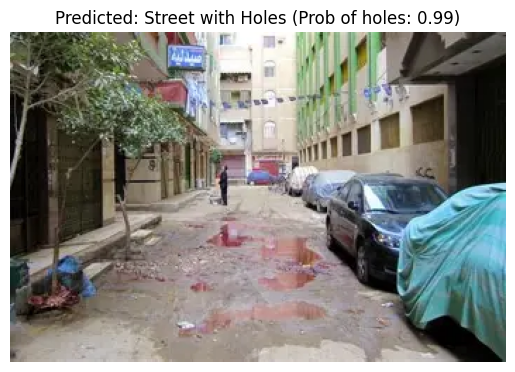

In [18]:
test_image_path = r"C:\Users\mousa\Downloads\OIP.webp" 

predicted_label, probability_of_holes = test_single_image(test_image_path, lr_corrected_model, scaler)

if predicted_label is not None:
    print(f"\n--- Prediction for {test_image_path} ---")
    if predicted_label == 0:
        print("Predicted: Good Street")
    else:
        print("Predicted: Street with Holes")
    print(f"Probability of being a 'Street with Holes': {probability_of_holes:.4f}")


    img_display = Image.open(test_image_path)
    plt.imshow(img_display)
    plt.title(f"Predicted: {'Street with Holes' if predicted_label == 1 else 'Good Street'} (Prob of holes: {probability_of_holes:.2f})")
    plt.axis('off')
    plt.show()

In [19]:
# save the model 
import joblib
model_filename = 'lr_corrected_model.pkl'
joblib.dump(lr_corrected_model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to lr_corrected_model.pkl
